# TP sur l'analyse en composantes principales

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### 1) Créez un tableau numpy contenant les données du fichier

In [5]:
data = "data.csv"
data = pd.read_csv(data)
data.head()
data = data.drop(columns=['Unnamed: 0'])

### 2) Affichez le scatter_matrix des données

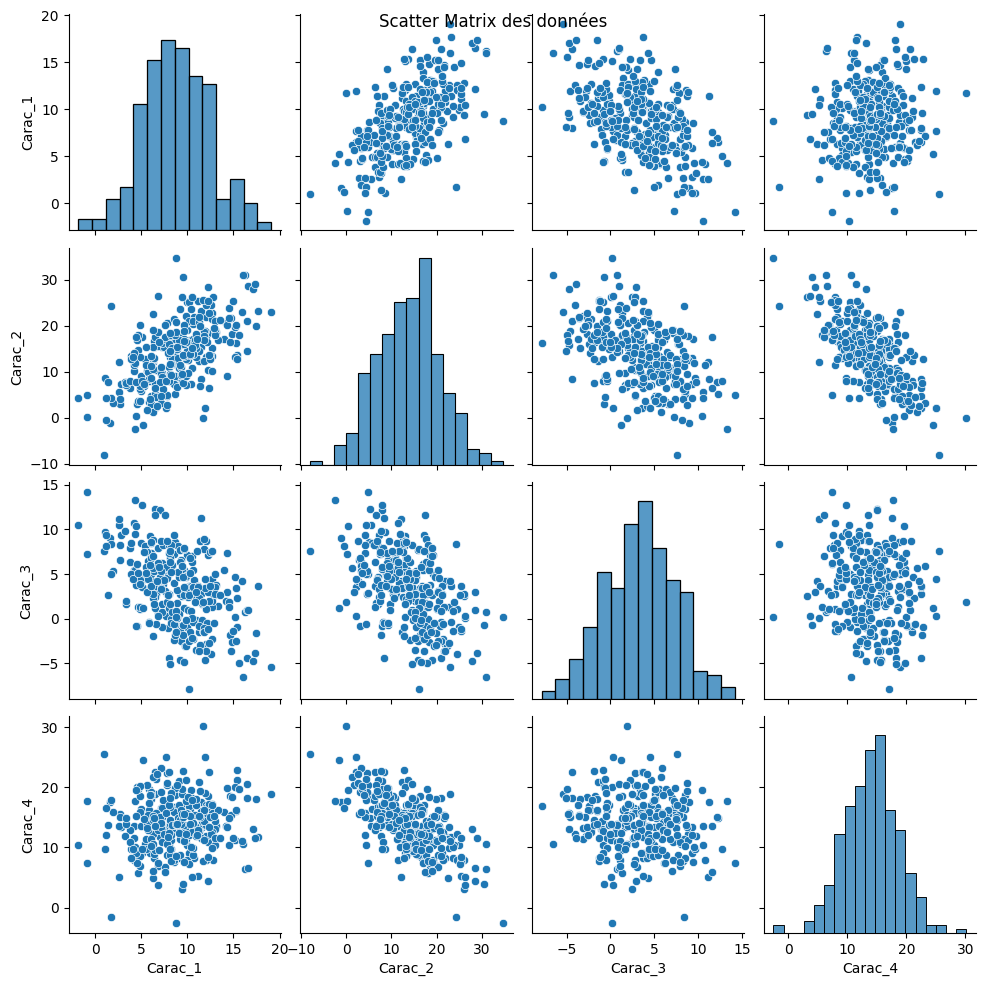

In [6]:
sns.pairplot(data)
plt.suptitle('Scatter Matrix des données')
plt.show()

### 3) Chaque colonne représente une variable et chaque ligne représente une observation. Donnez la moyenne et la variance de chacune des variables.

In [7]:
mean_values = data.mean()
variance_values = data.var()
print("Moyenne des variables:\n", mean_values)
print("Variance des variables:\n", variance_values)

Moyenne des variables:
 Carac_1     8.783984
Carac_2    13.864733
Carac_3     3.374047
Carac_4    13.957993
dtype: float64
Variance des variables:
 Carac_1    13.620940
Carac_2    47.800352
Carac_3    16.434095
Carac_4    21.704749
dtype: float64


### 4) Donnez la matrice de covariance et la matrice de corrélation. Qu'en déduisez-vous sur la corrélation des variables ?

In [9]:
covariance_matrix = data.cov()
correlation_matrix = data.corr()
print("Matrice de covariance:\n", covariance_matrix, "\n")
print("Matrice de correlation:\n", correlation_matrix)

Matrice de covariance:
            Carac_1    Carac_2    Carac_3    Carac_4
Carac_1  13.620940  15.025246  -7.344876   1.727719
Carac_2  15.025246  47.800352 -13.459012 -21.626639
Carac_3  -7.344876 -13.459012  16.434095  -2.469832
Carac_4   1.727719 -21.626639  -2.469832  21.704749 

Matrice de correlation:
           Carac_1   Carac_2   Carac_3   Carac_4
Carac_1  1.000000  0.588847 -0.490917  0.100483
Carac_2  0.588847  1.000000 -0.480203 -0.671423
Carac_3 -0.490917 -0.480203  1.000000 -0.130773
Carac_4  0.100483 -0.671423 -0.130773  1.000000


### 5) Transformez les données de sorte que chaque variable soit centrée réduite.

In [10]:
scaler = StandardScaler()
donne_centre_reduite = scaler.fit_transform(data)
donne_centre_reduite = pd.DataFrame(donne_centre_reduite, columns=data.columns)

### 6) Affichez le scatter_matrix des données

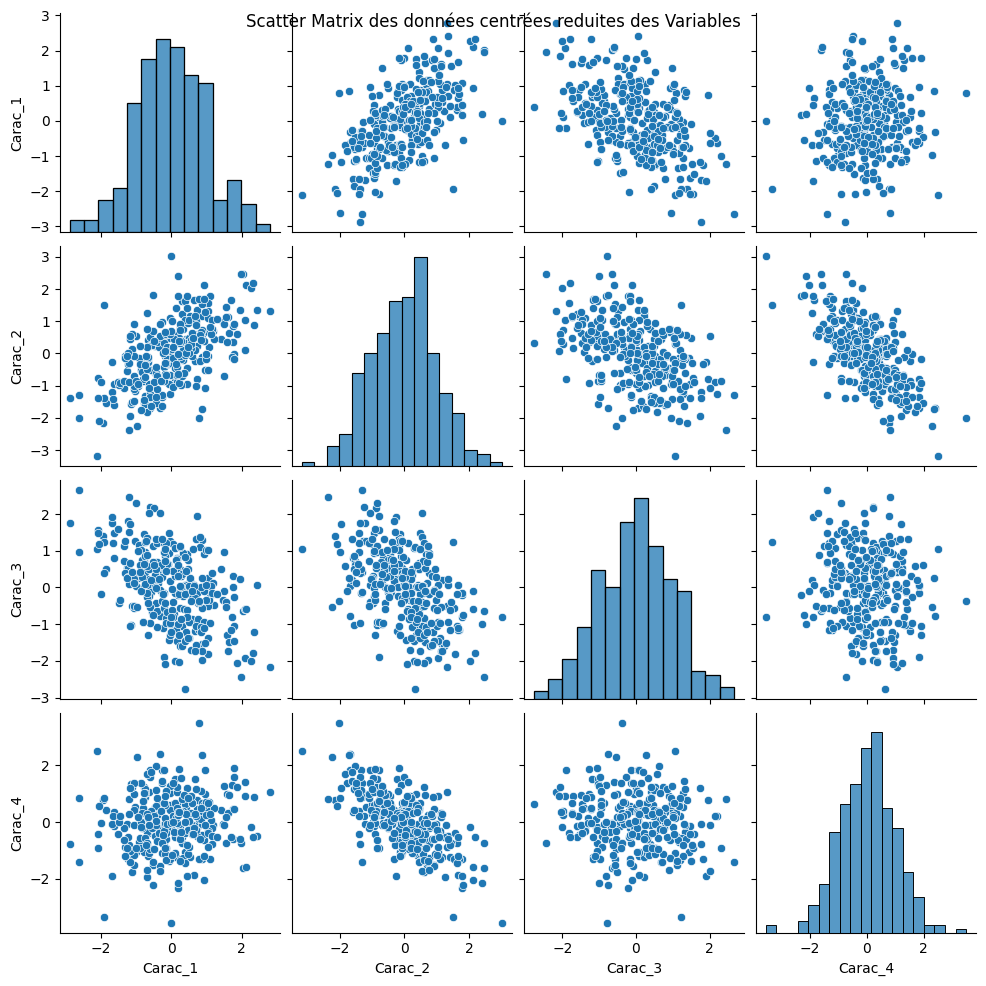

In [11]:
sns.pairplot(donne_centre_reduite)
plt.suptitle('Scatter Matrix des données centrées reduites des Variables')
plt.show()

### 7) Donnez la matrice de covariance et de corrélation des données transformées.

In [13]:
covariance_matrix_donne_centre_reduite = donne_centre_reduite.cov()
correlation_matrix_donne_centre_reduite = donne_centre_reduite.corr()
print("Matrice de covariance  des données centrées reduite:\n", covariance_matrix_donne_centre_reduite, "\n")
print("Matrice de correlation  des données centrées reduite:\n", correlation_matrix_donne_centre_reduite)

Matrice de covariance  des données centrées reduite:
           Carac_1   Carac_2   Carac_3   Carac_4
Carac_1  1.003344  0.590816 -0.492559  0.100819
Carac_2  0.590816  1.003344 -0.481809 -0.673668
Carac_3 -0.492559 -0.481809  1.003344 -0.131210
Carac_4  0.100819 -0.673668 -0.131210  1.003344 

Matrice de correlation  des données centrées reduite:
           Carac_1   Carac_2   Carac_3   Carac_4
Carac_1  1.000000  0.588847 -0.490917  0.100483
Carac_2  0.588847  1.000000 -0.480203 -0.671423
Carac_3 -0.490917 -0.480203  1.000000 -0.130773
Carac_4  0.100483 -0.671423 -0.130773  1.000000


### 8) Trouver la base des vecteurs propres de la matrice de corrélation en utilisant la fonction numpy.linalg.eig(). Vérifier que les vecteurs sont unitaires et orthogonaux 2 a 2.

In [16]:
valeur_propre, vecteur_propre = np.linalg.eig(correlation_matrix_donne_centre_reduite)
print("Valeurs propres:\n", valeur_propre, "\n")
print("Vecteurs propres:\n", vecteur_propre)

Valeurs propres:
 [2.12097353 0.01534782 0.50918658 1.35449207] 

Vecteurs propres:
 [[-0.5224063  -0.36206924  0.67760196  0.36993663]
 [-0.64881643  0.71076979  0.02719112 -0.27037786]
 [ 0.47328978  0.23962009  0.72905329 -0.43250467]
 [ 0.28657579  0.55343869  0.09272279  0.77651943]]


### 9) Projetez les données dans la base des vecteurs propres. Que déduisez-vous de la matrice de corrélation des données ainsi transformées ?

In [17]:
donnee_projete= np.dot(donne_centre_reduite, vecteur_propre)
donnee_projete_df = pd.DataFrame(donnee_projete, columns=[f'PC{i+1}' for i in range(vecteur_propre.shape[1])])

### 10) Affichez le scatter_matrix des données

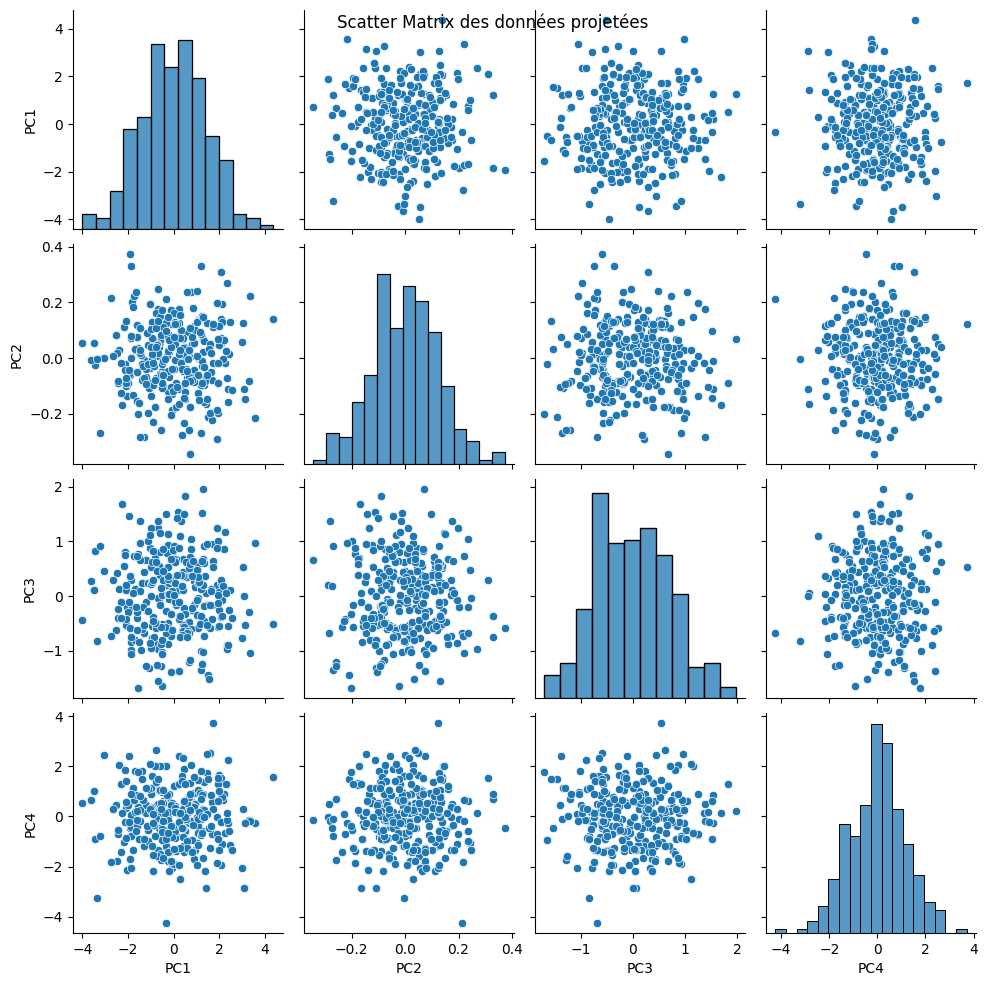

In [19]:
sns.pairplot(donnee_projete_df)
plt.suptitle('Scatter Matrix des données projetées')
plt.show()

### 11) Implantez la décomposition en éléments propres utilisant la méthode des puissances itérées et la méthode de déflation. Comparez votre résultat avec celui produit par numpy.linalg.eig()

In [21]:
def power_iteration(A, num_simulations: int = 1000):
    b_k = np.random.rand(A.shape[1])
    for _ in range(num_simulations):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
    return b_k

large_vecteur_propre = power_iteration(correlation_matrix_donne_centre_reduite)
print(large_vecteur_propre)

def deflate_matrix(A, eigenvector):
    outer_product = np.outer(eigenvector, eigenvector)
    A_new = A - valeur_propre[0] * outer_product
    return A_new

A_deflated = deflate_matrix(correlation_matrix_donne_centre_reduite, large_vecteur_propre)
large_vecteur_propre2 = power_iteration(A_deflated)
print(large_vecteur_propre2)


[-0.5224063  -0.64881643  0.47328978  0.28657579]
[ 0.36993663 -0.27037786 -0.43250467  0.77651943]
